In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# from cycler import cycler
# from itertools import cycle

# mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

import pickle
import os
import sys
import glob
from collections import OrderedDict
from tqdm import tqdm

In [2]:
import tensorflow as tf

In [3]:
model = tf.keras.models.load_model(filepath="001/model/")

In [4]:
X_train = np.load('processed_training_data/X_train.npy')
y_train = np.load('processed_training_data/y_train.npy')

X_val = np.load('processed_training_data/X_val.npy')
y_val = np.load('processed_training_data/y_val.npy')

In [5]:
X_train.shape

(11190, 10)

In [6]:
X_train

array([[-1.00000000e+00,  1.45764058e+00,  6.10406676e-01, ...,
         2.50807146e+00,  1.96731254e+00,  4.55021247e+00],
       [-9.99105546e-01,  1.45764058e+00,  6.10406676e-01, ...,
         2.50807146e+00,  1.96731254e+00,  4.55021247e+00],
       [-9.98211091e-01,  1.45764058e+00,  6.10406676e-01, ...,
         2.50807146e+00,  1.96731254e+00,  4.55021247e+00],
       ...,
       [-1.78890877e-03,  1.34700330e+00,  6.22741726e-01, ...,
         2.69375695e+00,  2.41990439e+00,  2.96754092e+00],
       [-8.94454383e-04,  1.34700330e+00,  6.22741726e-01, ...,
         2.69375695e+00,  2.41990439e+00,  2.96754092e+00],
       [ 4.16333634e-17,  1.34700330e+00,  6.22741726e-01, ...,
         2.69375695e+00,  2.41990439e+00,  2.96754092e+00]])

In [7]:
y_train_re = y_train.reshape(10, 1119)
y_val_re = y_val.reshape(2, 1119)

yhat = model.predict(X_train).reshape(10, 1119)
yhat_val = model.predict(X_val).reshape(2, 1119)

In [8]:
y_train_re[0]

array([0.19920734, 0.20169952, 0.20401811, ..., 0.00484632, 0.00330298,
       0.00171838])

In [9]:
times = X_train[:1119,0]

In [24]:
coords = np.unique(X_train[:,1:], axis=0)

In [41]:
val_coords = np.unique(X_val[:,1:], axis=0)

In [15]:
X_train.shape

(11190, 10)

Text(0.5, 1.0, '[1.18, 0.86, 2.55, 0.22, 0.18, 1.85, 4.65, 1.19, 5.29]')

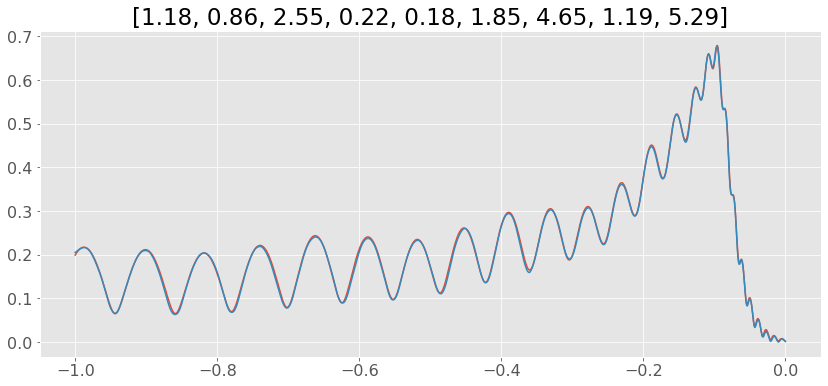

In [39]:
index=0
plt.figure(figsize=(14, 6))
plt.plot(times, y_train_re[index])
plt.plot(times, yhat[index])
# plt.xlim(-0.2, 0)
plt.title([np.around(c, 2) for c in coords[index]])

Text(0.5, 1.0, '[1.03, 0.18, 1.84, 3.95, 0.45, 0.84, 3.07, 2.28, 3.36]')

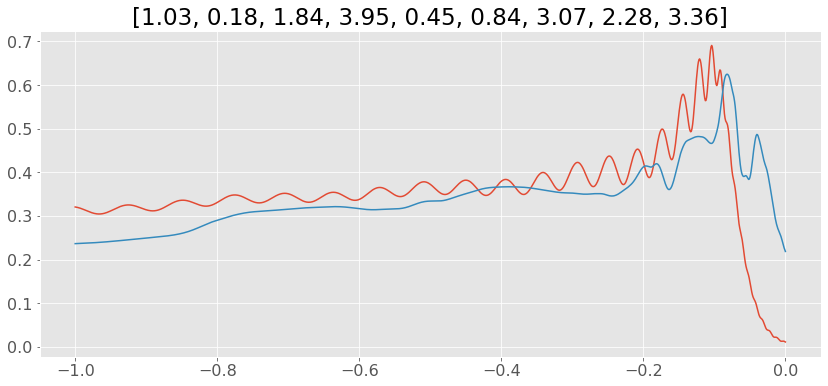

In [44]:
index=0
plt.figure(figsize=(14, 6))
plt.plot(times, y_val_re[index])
plt.plot(times, yhat_val[index])
# plt.xlim(-0.2, 0)
plt.title([np.around(c, 2) for c in val_coords[index]])